In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U mxnet-cu101==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████████████████████▌| 834.1 MB 556 kB/s eta 0:00:22tcmalloc: large alloc 1147494400 bytes == 0x3a34a000 @  0x7f4fbcb66615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |████████████████████████████████| 846.0 MB 22 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!nvidia-smi

Thu Sep 29 09:49:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    27W /  70W |   9256MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# -*- coding: utf-8 -*-
import os
import tensorflow as tf #tf 2.0.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset2_split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                )

valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/Dataset2_split/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            , shuffle=False )

Found 4743 images belonging to 4 classes.
Found 1189 images belonging to 4 classes.


In [ ]:
# ResNet152V2 Model
VGG16_model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# The last 15 layers fine tune
for layer in VGG16_model.layers[:-2]:
   layer.trainable = False

In [ ]:
x = VGG16_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
VGG16_model= Model(VGG16_model.input, output)

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
VGG16_model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
import time
import tensorflow as tf

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)



V1 = VGG16_model.fit(
  training_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  callbacks=[lrr]
)

print('Running time: %.4f seconds' % (time.time()-start))

Epoch 1/30
149/149 [==============================] - 872s 6s/step - loss: 0.5073 - accuracy: 0.7873 - val_loss: 0.2717 - val_accuracy: 0.8839 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 28s 190ms/step - loss: 0.1344 - accuracy: 0.9458 - val_loss: 0.1096 - val_accuracy: 0.9521 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 29s 193ms/step - loss: 0.0835 - accuracy: 0.9696 - val_loss: 0.0598 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 29s 198ms/step - loss: 0.0460 - accuracy: 0.9850 - val_loss: 0.0261 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 31s 205ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0157 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 30s 202ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.1904 - val_accuracy: 0.9588 - lr: 0.0010
Epoch 7/30
149/149 [==============================] - 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = VGG16_model.predict(valid_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
y_test=valid_set.classes
cf_matrix =confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


In [ ]:
y_pred2=y_pred
y_test2=y_test

In [ ]:
y_pred=y_pred2
y_test=y_test2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


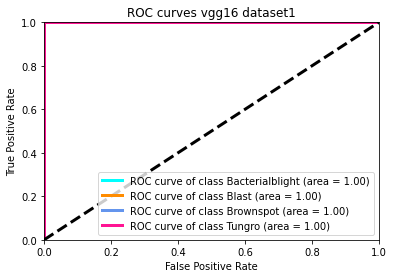

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
y_pred=y_pred2
y_test=y_test2
# Plot linewidth.
lw = 3
classes=np.unique(y_test)
n_classes=classes.shape[0]
y_test = label_binarize(y_test, classes=np.unique(y_test))
y_pred = label_binarize(y_pred, classes=np.unique(y_pred))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(),y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
class1=['Bacterialblight', 'Blast','Brownspot','Tungro']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','deeppink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class1[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves vgg16 dataset1')
plt.legend(loc="lower right")
plt.show()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


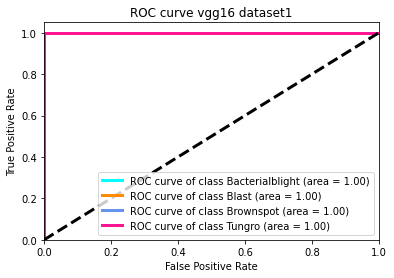

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
y_pred=y_pred2
y_test=y_test2
# Plot linewidth.
lw = 3
classes=np.unique(y_test)
n_classes=classes.shape[0]
y_test = label_binarize(y_test, classes=np.unique(y_test))
y_pred = label_binarize(y_pred, classes=np.unique(y_pred))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(),y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
class1=['Bacterialblight', 'Blast','Brownspot','Tungro']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','deeppink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class1[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve vgg16 dataset1')
plt.legend(loc="lower right")
plt.show()




<ipython-input-13-05d6acd9a19e>:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


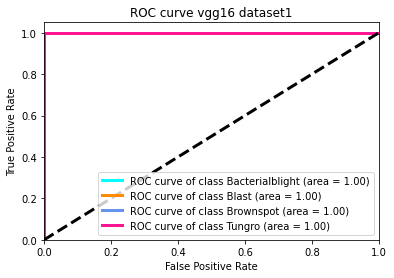

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
y_test=[0,1,2,3]
y_pred=[0,1,2,3]
# Plot linewidth.
lw = 3
classes=np.unique(y_test)
n_classes=classes.shape[0]
y_test = label_binarize(y_test, classes=np.unique(y_test))
y_pred = label_binarize(y_pred, classes=np.unique(y_pred))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(),y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
class1=['Bacterialblight', 'Blast','Brownspot','Tungro']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','deeppink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class1[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve vgg16 dataset1')
plt.legend(loc="lower right")
plt.show()




In [ ]:
# save it as a h5 file
import tensorflow as tf

VGG16_model.save('model_vgg16finetune2.h5')

In [ ]:
VGG16_model.save_weights('my_model_weights.h5')

In [ ]:
#Get the accuracy score v2
batch_size=32

test_score = VGG16_model.evaluate_generator(valid_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 100.00%
[INFO] Loss:  0.00022791801893617958


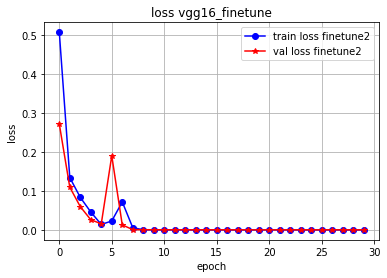

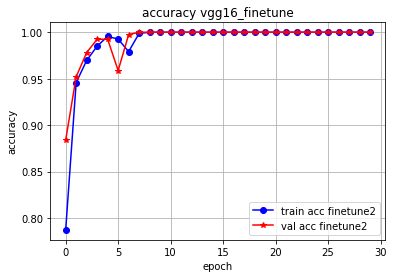

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V1.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V1.history['val_loss'], '-*', color='r', label='val loss finetune2')


plt.legend()
plt.grid()
plt.title("loss vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V1.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V1.history['val_accuracy'], '-*', color='r', label='val acc finetune2')

plt.legend()
plt.title("accuracy vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=VGG16_model.predict(valid_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=valid_set.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       317
          Blast       1.00      1.00      1.00       290
      Brownspot       1.00      1.00      1.00       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           1.00      1189
      macro avg       1.00      1.00      1.00      1189
   weighted avg       1.00      1.00      1.00      1189

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


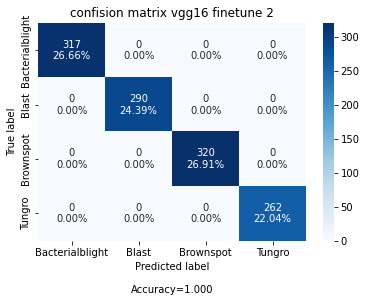

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='confision matrix vgg16 finetune 2')
plt.savefig('confision matrix vgg16 finetune.png')

In [ ]:
VGG16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for i, layer in enumerate(VGG16_model.layers):
    print(i,'\t',layer.trainable,'\t  :',layer.name)

0 	 False 	  : input_2
1 	 False 	  : block1_conv1
2 	 False 	  : block1_conv2
3 	 False 	  : block1_pool
4 	 False 	  : block2_conv1
5 	 False 	  : block2_conv2
6 	 False 	  : block2_pool
7 	 False 	  : block3_conv1
8 	 False 	  : block3_conv2
9 	 False 	  : block3_conv3
10 	 False 	  : block3_pool
11 	 False 	  : block4_conv1
12 	 False 	  : block4_conv2
13 	 False 	  : block4_conv3
14 	 False 	  : block4_pool
15 	 False 	  : block5_conv1
16 	 False 	  : block5_conv2
17 	 True 	  : block5_conv3
18 	 True 	  : block5_pool
19 	 True 	  : global_average_pooling2d_1
20 	 True 	  : flatten_1
21 	 True 	  : dense_3
22 	 True 	  : dropout_2
23 	 True 	  : dense_4
24 	 True 	  : dropout_3
25 	 True 	  : dense_5


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
img_size = (224, 224)
preprocess_input = keras.applications.resnet.preprocess_input
decode_predictions = keras.applications.resnet.decode_predictions

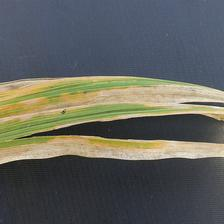

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

#myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/BLB/BLB1_162bc795-ab3b-4dd6-b556-ef02a65e3fdb.jpeg'  # just for example...
myFile ='/content/drive/MyDrive/ref29/split dataset ref 29/val/BLB/BLB1_3be3f22c-3ea9-44c1-a489-d1cecf303b94.jpeg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


Predicted: [[1. 0. 0. 0. 0. 0. 0. 0. 0.]]


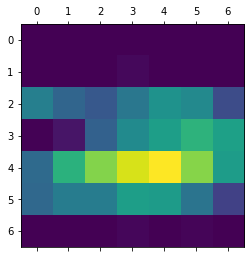

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

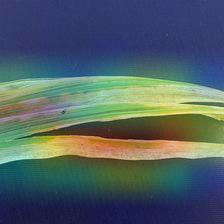

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

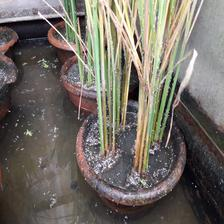

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/BPH/BPH1_076bc777-5b3c-4b50-825f-6eae716495b6.jpeg'  # just for example...
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


Predicted: [[0. 1. 0. 0. 0. 0. 0. 0. 0.]]


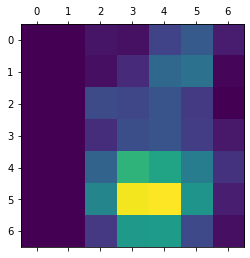

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

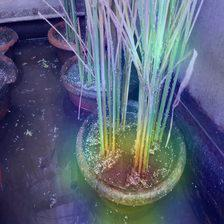

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

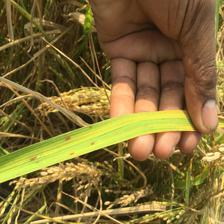

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/Brown_Spot/Brown_Spot1_0dc9ca44-a4d2-4fb9-8907-c4781f26e3bc.jpeg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[0. 0. 1. 0. 0. 0. 0. 0. 0.]]


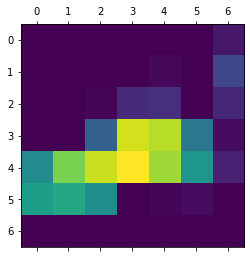

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

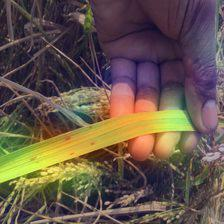

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

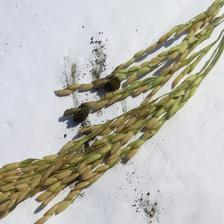

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/False_Smut/False_Smut2_2ed5533b-07cb-47ed-97f3-80de4f6b1876.jpeg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[0. 0. 0. 1. 0. 0. 0. 0. 0.]]


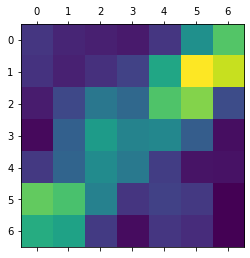

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

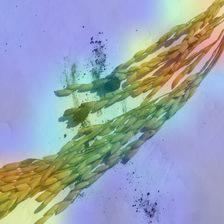

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

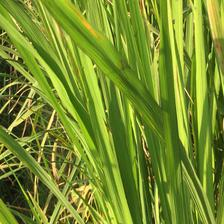

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/Healthy_Plant/Healthy1_5b62dfab-29b9-460f-ae60-547184c8cd86.jpeg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[0. 0. 0. 0. 0. 0. 0. 1. 0.]]


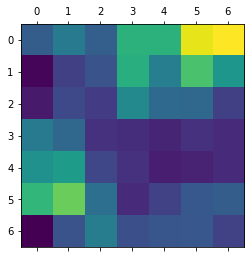

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

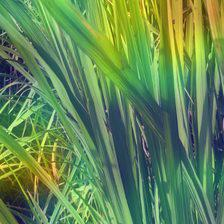

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

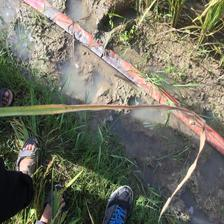

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/Healthy_Plant/Healthy3_c38f6da6-79b6-4b4d-bfe4-c16d2ee3cb54.jpeg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[0. 0. 0. 0. 1. 0. 0. 0. 0.]]


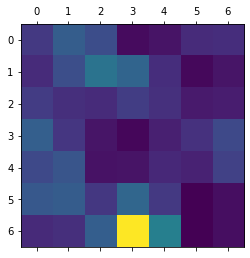

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

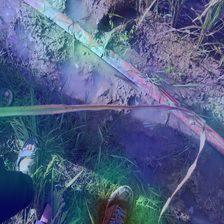

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

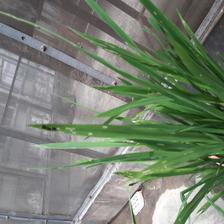

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/Hispa/Hispa1_add09d28-a5a0-42cc-8ca7-14fd9a193eb5.jpeg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[0. 0. 0. 0. 0. 1. 0. 0. 0.]]


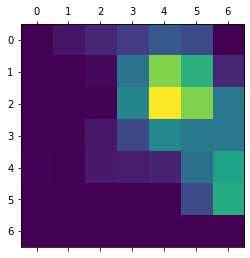

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

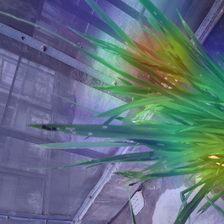

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

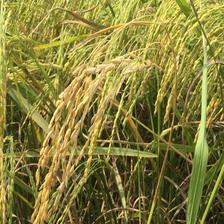

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/Neck_Blast/Neck_Blast1_eefdbf13-74e9-45d3-ac14-bff2bca7f0ff.jpeg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3890400e-15 1.0000000e+00
  0.0000000e+00 0.0000000e+00 6.6929395e-25 0.0000000e+00]]


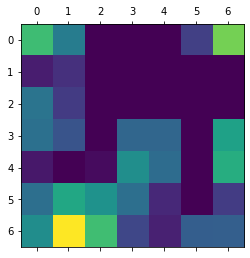

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

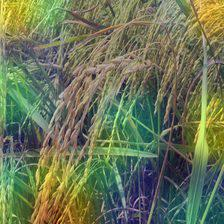

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

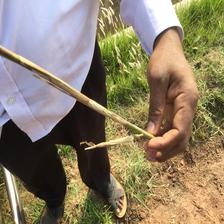

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/Sheath_Blight_Rot/Sheath_Blight_Rot3_5470521a-e761-4219-b0d7-30ae8121e29e.jpeg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999952e-01
  0.0000000e+00 0.0000000e+00 4.4811068e-07 0.0000000e+00]]


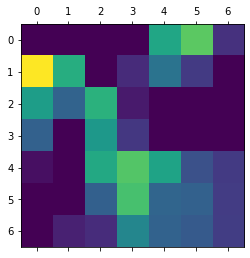

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

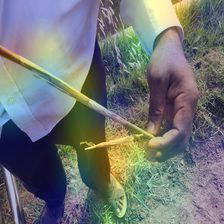

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

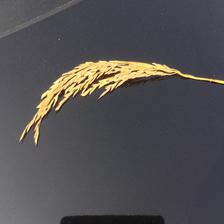

In [ ]:
import sys
model_builder = new_VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/ref29/split dataset ref 29/val/Stemborer/Stemborer1_1ce1fae7-0bc4-4fb8-aee1-f164fc491976.jpeg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6685675e-10 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 8.4563850e-38]]


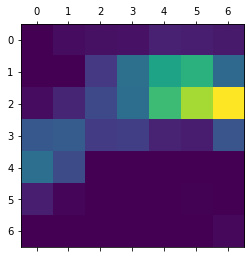

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

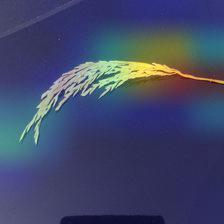

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [ ]:
sparsified_weights = []
for w in VGG16_model.get_layer(name='dropout_1').get_weights():
    sparsified_weights.append(w)

In [ ]:
x = (VGG16_model.layers[-2].output)

new_VGG16_model= Model(VGG16_model.input,x)

In [ ]:
for i, layer in enumerate(new_VGG16_model.layers):
    print(i,'\t',layer.trainable,'\t  :',layer.name)

0 	 False 	  : input_2
1 	 False 	  : block1_conv1
2 	 False 	  : block1_conv2
3 	 False 	  : block1_pool
4 	 False 	  : block2_conv1
5 	 False 	  : block2_conv2
6 	 False 	  : block2_pool
7 	 False 	  : block3_conv1
8 	 False 	  : block3_conv2
9 	 False 	  : block3_conv3
10 	 False 	  : block3_pool
11 	 False 	  : block4_conv1
12 	 False 	  : block4_conv2
13 	 False 	  : block4_conv3
14 	 False 	  : block4_pool
15 	 False 	  : block5_conv1
16 	 False 	  : block5_conv2
17 	 True 	  : block5_conv3
18 	 True 	  : block5_pool
19 	 True 	  : global_average_pooling2d_1
20 	 True 	  : flatten_1
21 	 True 	  : dense_3
22 	 True 	  : dropout_2
23 	 True 	  : dense_4
24 	 True 	  : dropout_3


In [ ]:
output  = Dense(units=9, activation='softmax')(VGG16_model.layers[-2].output)
new_VGG16_model= Model(VGG16_model.input, output)

In [ ]:
for i, layer in enumerate(new_VGG16_model.layers):
    print(i,'\t',layer.trainable,'\t  :',layer.name)

0 	 False 	  : input_2
1 	 False 	  : block1_conv1
2 	 False 	  : block1_conv2
3 	 False 	  : block1_pool
4 	 False 	  : block2_conv1
5 	 False 	  : block2_conv2
6 	 False 	  : block2_pool
7 	 False 	  : block3_conv1
8 	 False 	  : block3_conv2
9 	 False 	  : block3_conv3
10 	 False 	  : block3_pool
11 	 False 	  : block4_conv1
12 	 False 	  : block4_conv2
13 	 False 	  : block4_conv3
14 	 False 	  : block4_pool
15 	 False 	  : block5_conv1
16 	 False 	  : block5_conv2
17 	 True 	  : block5_conv3
18 	 True 	  : block5_pool
19 	 True 	  : global_average_pooling2d_1
20 	 True 	  : flatten_1
21 	 True 	  : dense_3
22 	 True 	  : dropout_2
23 	 True 	  : dense_4
24 	 True 	  : dropout_3
25 	 True 	  : dense_6


In [ ]:
new_VGG16_model.get_layer(name='dropout_1').set_weights(sparsified_weights)

In [ ]:
VGG16_model.get_weights()      # last layer, Dense (9)
new_VGG16_model.get_weights()  # last layer, Dense (4)

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ref29/split dataset ref 29/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                )

valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/ref29/split dataset ref 29/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            , shuffle=False )

Found 1136 images belonging to 9 classes.
Found 290 images belonging to 9 classes.


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
new_VGG16_model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
import time
import tensorflow as tf

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)



V2 = new_VGG16_model.fit(
  training_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  callbacks=[lrr]
)

print('Running time: %.4f seconds' % (time.time()-start))

Epoch 1/30
36/36 [==============================] - 392s 11s/step - loss: 1.8374 - accuracy: 0.3319 - val_loss: 1.2671 - val_accuracy: 0.5621 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 7s 189ms/step - loss: 1.0735 - accuracy: 0.6039 - val_loss: 0.7531 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 7s 190ms/step - loss: 0.6034 - accuracy: 0.7879 - val_loss: 0.4716 - val_accuracy: 0.8414 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 7s 193ms/step - loss: 0.3506 - accuracy: 0.8759 - val_loss: 0.3626 - val_accuracy: 0.8724 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 7s 192ms/step - loss: 0.2581 - accuracy: 0.9181 - val_loss: 0.2942 - val_accuracy: 0.9034 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 7s 193ms/step - loss: 0.1451 - accuracy: 0.9586 - val_loss: 0.2409 - val_accuracy: 0.9207 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 7s 194ms/step - lo

In [ ]:
#Get the accuracy score v2
batch_size=32

test_score = new_VGG16_model.evaluate_generator(valid_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 94.83%
[INFO] Loss:  0.14954142272472382


In [ ]:
#Get the accuracy score v2
batch_size=32

test_score = new_VGG16_model.evaluate_generator(valid_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 95.52%
[INFO] Loss:  0.18094633519649506


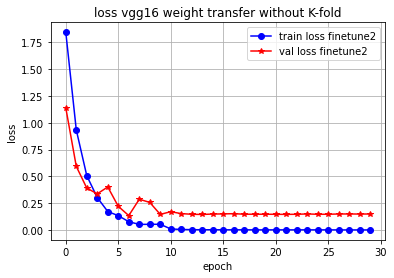

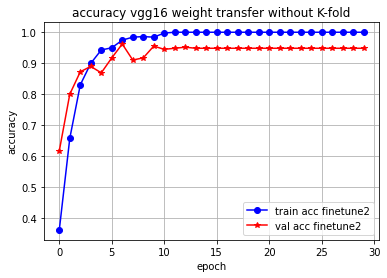

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V2.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V2.history['val_loss'], '-*', color='r', label='val loss finetune2')


plt.legend()
plt.grid()
plt.title("loss vgg16 weight transfer without K-fold")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V2.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V2.history['val_accuracy'], '-*', color='r', label='val acc finetune2')

plt.legend()
plt.title("accuracy vgg16 weight transfer without K-fold")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

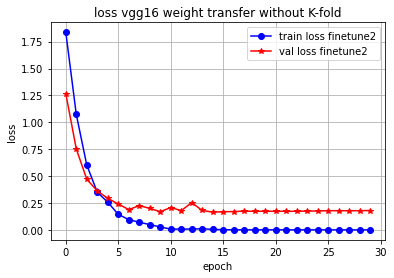

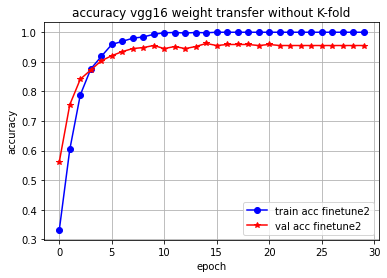

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V2.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V2.history['val_loss'], '-*', color='r', label='val loss finetune2')


plt.legend()
plt.grid()
plt.title("loss vgg16 weight transfer without K-fold")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V2.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V2.history['val_accuracy'], '-*', color='r', label='val acc finetune2')

plt.legend()
plt.title("accuracy vgg16 weight transfer without K-fold")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = new_VGG16_model.predict(valid_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=valid_set.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix)

[[25  0  1  0  0  0  0  2  0]
 [ 0 14  0  0  0  1  0  0  0]
 [ 0  0 23  0  0  0  0  0  0]
 [ 1  0  0 17  0  1  0  0  0]
 [ 0  1  0  0 46  0  0  0  0]
 [ 0  2  0  0  0 12  1  0  0]
 [ 0  0  0  0  0  0 58  0  0]
 [ 0  0  0  1  1  0  0 42  0]
 [ 0  0  0  0  0  0  1  2 38]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = new_VGG16_model.predict(valid_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=valid_set.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix)

[[27  0  0  0  0  0  0  1  0]
 [ 0 14  0  0  0  1  0  0  0]
 [ 0  0 23  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0]
 [ 0  1  0  0 44  0  0  2  0]
 [ 0  2  0  0  0 13  0  0  0]
 [ 0  0  0  0  1  0 57  0  0]
 [ 1  0  0  0  2  0  0 41  0]
 [ 0  0  0  0  0  0  0  2 39]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


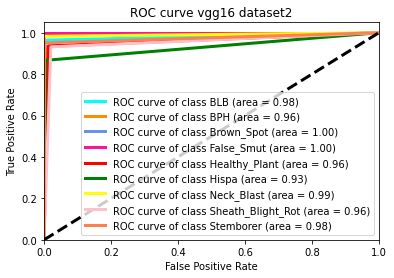

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Plot linewidth.
lw = 3
classes=np.unique(test_y)
n_classes=classes.shape[0]
y_test = label_binarize(test_y, classes=np.unique(test_y))
y_pred = label_binarize(y_pred, classes=np.unique(y_pred))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(),y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
class1=['BLB', 'BPH','Brown_Spot','False_Smut','Healthy_Plant','Hispa','Neck_Blast','Sheath_Blight_Rot','Stemborer']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','deeppink','red','green','yellow','pink','coral'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class1[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve vgg16 dataset2')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


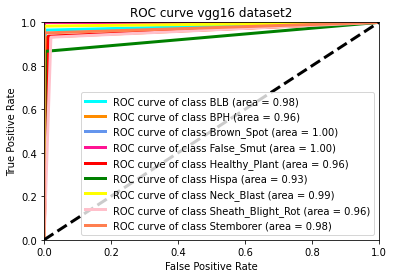

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Plot linewidth.
lw = 3
classes=np.unique(test_y)
n_classes=classes.shape[0]
y_test = label_binarize(test_y, classes=np.unique(test_y))
y_pred = label_binarize(y_pred, classes=np.unique(y_pred))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(),y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
class1=['BLB', 'BPH','Brown_Spot','False_Smut','Healthy_Plant','Hispa','Neck_Blast','Sheath_Blight_Rot','Stemborer']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','deeppink','red','green','yellow','pink','coral'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class1[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve vgg16 dataset2')
plt.legend(loc="lower right")
plt.show()


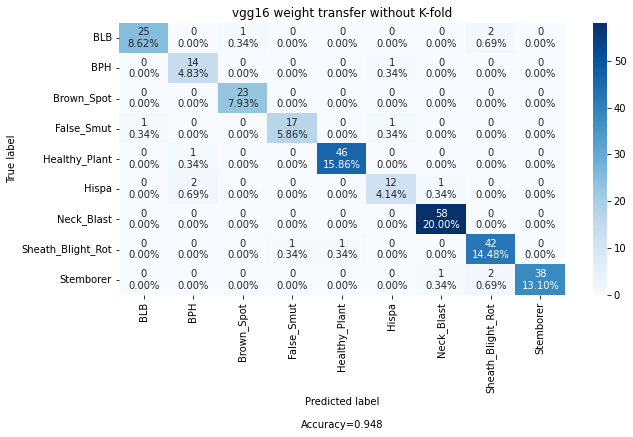

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories =  ['BLB', 'BPH','Brown_Spot','False_Smut','Healthy_Plant','Hispa','Neck_Blast','Sheath_Blight_Rot','Stemborer']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='vgg16 weight transfer without K-fold',figsize=(10,5))
plt.savefig('confision matrix vgg16 finetune.png')

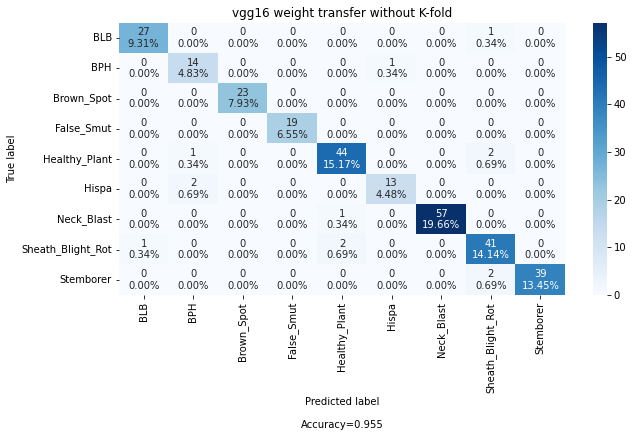

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories =  ['BLB', 'BPH','Brown_Spot','False_Smut','Healthy_Plant','Hispa','Neck_Blast','Sheath_Blight_Rot','Stemborer']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='vgg16 weight transfer without K-fold',figsize=(10,5))
plt.savefig('confision matrix vgg16 finetune.png')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=new_VGG16_model.predict(valid_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=valid_set.classes
#get classification report
target_names =  ['BLB', 'BPH','Brown_Spot','False_Smut','Healthy_Plant','Hispa','Neck_Blast','Sheath_Blight_Rot','Stemborer']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                   precision    recall  f1-score   support

              BLB       0.89      0.96      0.93        26
              BPH       0.93      0.82      0.87        17
       Brown_Spot       1.00      0.96      0.98        24
       False_Smut       0.89      0.94      0.92        18
    Healthy_Plant       0.98      0.98      0.98        47
            Hispa       0.80      0.86      0.83        14
       Neck_Blast       1.00      0.97      0.98        60
Sheath_Blight_Rot       0.95      0.91      0.93        46
        Stemborer       0.93      1.00      0.96        38

         accuracy                           0.95       290
        macro avg       0.93      0.93      0.93       290
     weighted avg       0.95      0.95      0.95       290

[[25  0  0  1  0  0  0  0  0]
 [ 0 14  0  0  1  2  0  0  0]
 [ 1  0 23  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  1  0]
 [ 0  0  0  0 46  0  0  1  0]
 [ 0  1  0  1  0 12  0  0  0]
 [ 0  0  0  0  0  1 58  0  1]
 [ 2  0  0  0  0  0 

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=new_VGG16_model.predict(valid_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=valid_set.classes
#get classification report
target_names =  ['BLB', 'BPH','Brown_Spot','False_Smut','Healthy_Plant','Hispa','Neck_Blast','Sheath_Blight_Rot','Stemborer']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                   precision    recall  f1-score   support

              BLB       0.96      0.96      0.96        28
              BPH       0.93      0.82      0.87        17
       Brown_Spot       1.00      1.00      1.00        23
       False_Smut       1.00      1.00      1.00        19
    Healthy_Plant       0.94      0.94      0.94        47
            Hispa       0.87      0.93      0.90        14
       Neck_Blast       0.98      1.00      0.99        57
Sheath_Blight_Rot       0.93      0.89      0.91        46
        Stemborer       0.95      1.00      0.97        39

         accuracy                           0.96       290
        macro avg       0.95      0.95      0.95       290
     weighted avg       0.96      0.96      0.95       290

[[27  0  0  0  0  0  0  1  0]
 [ 0 14  0  0  1  2  0  0  0]
 [ 0  0 23  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0 44  0  1  2  0]
 [ 0  1  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0 57  0  0]
 [ 1  0  0  0  2  0 

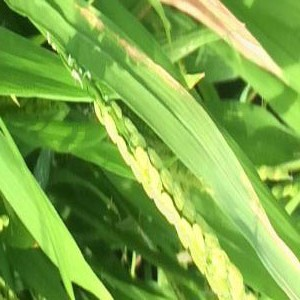

In [ ]:
import sys
model_builder = VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/Dataset2_split/val/Bacterialblight/BACTERAILBLIGHT3_005.jpg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[ 945.9935     9.41402 -521.1104  -400.40363]]


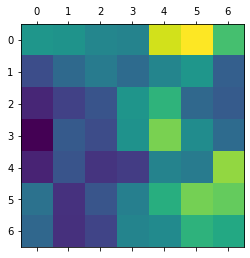

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

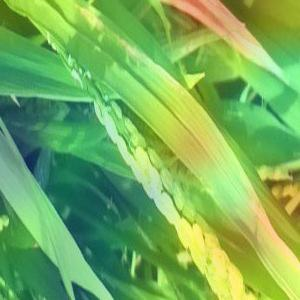

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

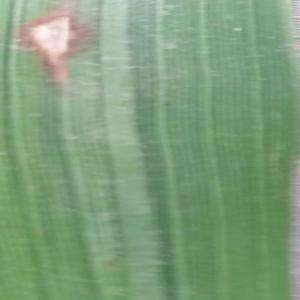

In [ ]:
import sys
model_builder = VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/Dataset2_split/val/Blast/BLAST1_005.jpg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[  83.8858   -115.983444  115.47696   -92.74151 ]]


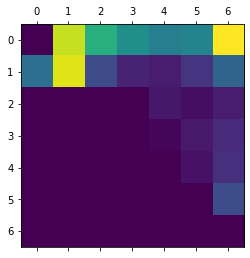

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

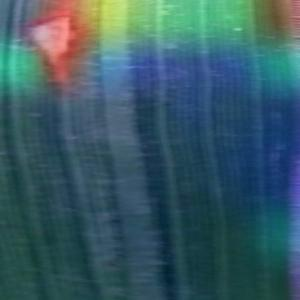

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

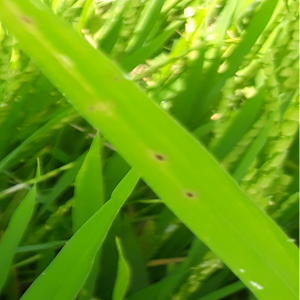

In [ ]:
import sys
model_builder = VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/derive/MyDrive/Dataset2_split/val/Brownspot/BROWNSPOT1_002.jpg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[  60.66668    20.066233  259.26678  -341.21204 ]]


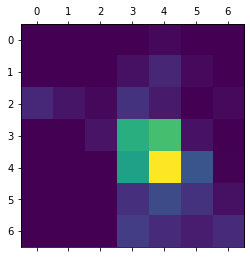

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

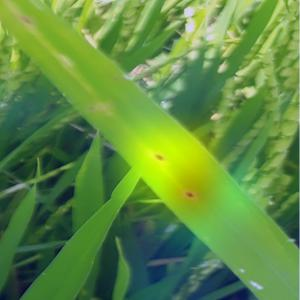

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

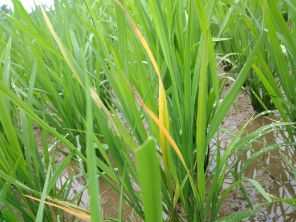

In [ ]:
import sys
model_builder = VGG16_model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/Dataset2_split/val/Tungro/TUNGRO1_015.jpg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))

Predicted: [[  -7.2199597 -276.26956   -178.77496    376.24103  ]]


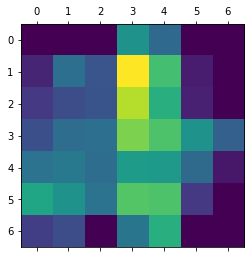

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = model_builder

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_pool')

# Display heatmap
plt.matshow(heatmap)
plt.show()

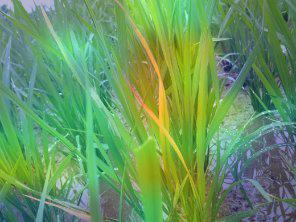

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)